In [ ]:
!pip install geopandas

# Setup



---
# Exercise
- load the shapefile of ISTAT with the information of the provinces
- filter it for an italian provice at your choice (eg. Trento)
- plot it
- identify the cities of the province selected with the biggest and smallest area
- extract all the centroids of the areas expressed in WGS84
- extract a rappresenative point for the area of a municipality in WGS84<br/>suggestion: *.representative_point()*
- save the points in a GeoJSON file
- calculate the distance on the geodentic between the municipaly with the big area and smallest area by using the centroid
---

## Solutions and learning objectives
* repeat the concepts on the previous lesson
* introduce geopackage
* centroid vs representative point

Import of the packages

In [ ]:
import geopandas as gpd
from google.colab import files

### load the shapefile of ISTAT with the information of the provinces

This request is replaced with the use of geopackage

In the course material a geopackage file is available with all the shapefiles of the administrative limits of ISTAT (2020) with generalized geometries

[download](https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg)

for convenience, download the file with "wget" from the command line on Linux


In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg

--2020-10-01 11:36:19--  https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg [following]
--2020-10-01 11:36:19--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23396352 (22M) [application/octet-stream]
Saving to: ‘ista

# Geopackage
![](https://www.ogc.org/pub/www/files/blog/Geopackage_layers.png)

[GeoPackage](http://opengeospatial.github.io/e-learning/geopackage/text/basic-index.html) is used for storing and accessing:
* Vector feature data
* Imagery tile matrix sets
* Raster map tile matrix sets
* non-spatial tabular data
* Metadata that describes other stored data

To have a look at the structure of the files, download the files and open them using the basic SQLite3 command-line utility.

```
sqlite3 istat_administrative_units_2020.gpkg
```
```
SQLite version 3.31.1 2020-01-27 19:55:54
Enter ".help" for usage hints.
sqlite> .table
```
```
gpkg_contents                     rtree_macroregions_geom_rowid   
gpkg_extensions                   rtree_municipalities_geom       
gpkg_geometry_columns             rtree_municipalities_geom_node  
gpkg_ogr_contents                 rtree_municipalities_geom_parent
gpkg_spatial_ref_sys              rtree_municipalities_geom_rowid 
gpkg_tile_matrix                  rtree_provincies_geom           
gpkg_tile_matrix_set              rtree_provincies_geom_node      
macroregions                      rtree_provincies_geom_parent    
municipalities                    rtree_provincies_geom_rowid     
provincies                        rtree_regions_geom              
regions                           rtree_regions_geom_node         
rtree_macroregions_geom           rtree_regions_geom_parent       
rtree_macroregions_geom_node      rtree_regions_geom_rowid        
rtree_macroregions_geom_parent 
```

```
sqlite> select * from macroregions;
```
```
1|GP|1|Nord-Ovest
2|GP|2|Nord-Est
3|GP|3|Centro
4|GP|4|Sud
5|GP|5|Isole
```
```
sqlite> .q
```

Geopandas can manage geopackage by using [fiona](https://github.com/Toblerity/Fiona)

In [ ]:
import fiona

In [ ]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'rw',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'rw',
 'ESRI Shapefile': 'raw',
 'ESRIJSON': 'r',
 'GML': 'rw',
 'GPKG': 'raw',
 'GPSTrackMaker': 'rw',
 'GPX': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OGR_GMT': 'rw',
 'OGR_PDS': 'r',
 'OpenFileGDB': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

```
'GPKG': 'raw',
```
**raw** => **r**ead **a**ppend **w**rite

geopandas can:
* **r**ead *geopackage* files
* **a**append data to a *geopackage* file
* **w**rite data to a *geopackage* file

geopackage can store more layers, so we have to investigate the contents

In [ ]:
fiona.listlayers('istat_administrative_units_2020.gpkg')

['municipalities', 'provincies', 'regions', 'macroregions']

In [ ]:
provincies = gpd.read_file("istat_administrative_units_2020.gpkg",layer="provincies")

In [ ]:
provincies.head(3)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,"MULTIPOLYGON (((438328.612 5087208.215, 439028..."
1,1,1,3,0,3,Novara,-,Novara,NO,Provincia,"MULTIPOLYGON (((460929.542 5076320.298, 461165..."
2,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,"MULTIPOLYGON (((411015.006 5049970.983, 411266..."


In [ ]:
provincies.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'DEN_PROV',
       'DEN_CM', 'DEN_UTS', 'SIGLA', 'TIPO_UTS', 'geometry'],
      dtype='object')

**COD_RIP**<br/>
*codice ripartizione*<br/>
numeric code of the macroregion of belonging

**COD_REG**<br/>
*codice regione*<br/>
numeric code of the region of belonging

**COD_PROV**<br/>
*codice provincia*<br/>
numeric code of the region of belonging

**COD_CM**<br/>
*codice comune*<br/>
Istat code of the metropolitan city (three characters in
reference to all official statistics are
numeric format) obtained by adding the value 200 to
adopted the statistical codes of the cities
corresponding code of the province.

**COD_UTS**<br/>
*codice unità territoriali sovracomunali*<br/>
Numeric code that uniquely identifies the Units
territorial supra-municipal on the national territory.

**DEN_PROV**<br/>
*denominazione provincia*<br/>
name of the province

**DEN_CM**<br/>
*denominazione città metropolitana*<br/>
name of the metropolitan city

**DEN_UTS**<br/>
*denominazione unità territoriale sovracomunale*<br/>
Denomination of the supra-municipal territorial units.

**SIGLA**<br/>
*sigla*<br/>
abbreviation

**TIPO_UTS**<br/>
*tipologia unità territoriale sovracomunale*<br/>
kind of supra-municipal territorial units.



## filter it for an italian provice at your choice (eg. Trento)

In [ ]:
trentino = provincies[provincies['DEN_PROV']=='Trento']

In [ ]:
trentino

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,geometry
24,2,4,22,0,22,Trento,-,Trento,TN,Provincia autonoma,"MULTIPOLYGON (((716676.337 5153931.623, 716029..."


## plot it

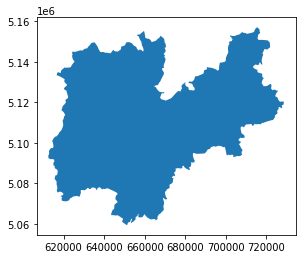

In [ ]:
trentino.plot()

## identify the municipalities of the province selected with the biggest and smallest area

this means we need to use another layer / dataset

In [ ]:
municipalities = gpd.read_file("istat_administrative_units_2020.gpkg",layer="municipalities")

In [ ]:
municipalities.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'geometry'],
      dtype='object')

**COD_RIP**<br/>
*codice ripartizione*<br/>
numeric code of the macroregion of belonging

**COD_REG**<br/>
*codice regione*<br/>
numeric code of the region of belonging

**COD_PROV**<br/>
*codice provincia*<br/>
numeric code of the region of belonging

**COD_CM**<br/>
*codice comune*<br/>
unique numeric identification code of the municipality within the province of belonging

**COD_UTS**<br/>
*codice unità territoriali sovracomunali*<br/>
Numeric code that uniquely identifies the Units
territorial supra-municipal on the national territory.

**PRO_COM**<br/>
*provincia comune**<br/>
Numeric code that uniquely identifies the Municipality
on the national territory. (= COD_PROV & COD_COM) 

**PRO_COM_T**<br/>
*provincia comune territorio**<br/>
Alphanumeric code that uniquely identifies the
Municipality on the national territory.<br/>
Like PRO_COM but definied in 6 fixed characters.

**COMUNE**<br/>
*comune*<br/>
Name of the Municipality

**COMUNE_A**<br/>
*comune alternativa*<br/>
Name of the Municipality in a language other than Italian

**CC_UTS**<br/>
*comune capoluogo*<br/>
Provincial capital or metropolitan city<br/>
1 => True<br/>
2 => False



the **COD_PROV** of the Province of Trento is **22**

In [ ]:
# filter the province
municipalities_province_trento = municipalities[municipalities.COD_PROV==22]

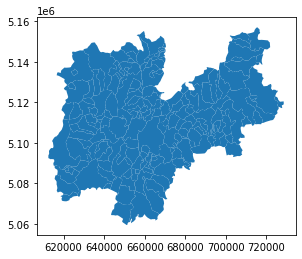

In [ ]:
# plot it
municipalities_province_trento.plot()

## identify the cities of the province selected with the biggest and smallest area

**CAUTION**:

we are using generalized boundaries !!!

finding the max area

In [ ]:
max_area = municipalities_province_trento.geometry.area.max()

In [ ]:
max_area

199625902.75494903

finding the min area

In [ ]:
min_area = municipalities_province_trento.geometry.area.min()

In [ ]:
min_area

1652100.49475859

... you can obtain the same in another way (combination of the requests)

In [ ]:
municipalities[municipalities.COD_PROV==22].geometry.area.min()

1652100.49475859

### identify the municipality with the biggest area




In [ ]:
maxarea_municipality_trentino = provincia_trento[provincia_trento.geometry.area == max_area]

In [ ]:
maxarea_municipality_trentino.PRO_COM_T

3275    022245
Name: PRO_COM_T, dtype: object

In [ ]:
maxarea_municipality_trentino.COMUNE

3275    Primiero San Martino di Castrozza
Name: COMUNE, dtype: object

the municipality with the bigger area is **Primiero San Martino di Castrozza** (022245)

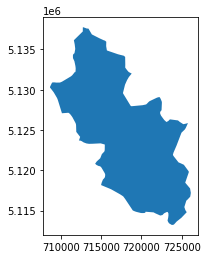

In [ ]:
maxarea_municipality_trentino.plot()

### identify the municipality with the smallest area


In [ ]:
minarea_municipality_trentino = provincia_trento[provincia_trento.geometry.area == min_area]

In [ ]:
minarea_municipality_trentino.COMUNE

1309    Carzano
Name: COMUNE, dtype: object

In [ ]:
minarea_municipality_trentino.PRO_COM_T

1309    022043
Name: PRO_COM_T, dtype: object

the municipality with the smallest area is **Carzano** (022243)

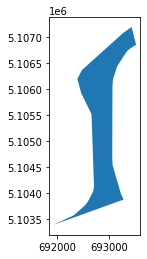

In [ ]:
minarea_municipality_trentino.plot()

## extract all the centroids of the areas expressed in WGS84

In [ ]:
maxarea_municipality_trentino.geometry.centroid.to_crs(epsg=4326)

3275    POINT (11.82683 46.24190)
dtype: geometry

In [ ]:
minarea_municipality_trentino.geometry.centroid.to_crs(epsg=4326)

1309    POINT (11.49436 46.07497)
dtype: geometry

## extract a rappresenative point for the area of the smallest and bigger municipality in WGS84

In [ ]:
representative_point_minarea_municipality = minarea_municipality_trentino.geometry.representative_point()

In [ ]:
representative_point_maxarea_municipality = maxarea_municipality_trentino.geometry.representative_point()

In [ ]:
representative_point_minarea_municipality.to_crs(epsg=4326)

1309    POINT (11.49403 46.07235)
dtype: geometry

In [ ]:
representative_point_maxarea_municipality.to_crs(epsg=4326)

3275    POINT (11.83795 46.24792)
dtype: geometry

## save the points in a GeoJSON file
we can save each point in geojson 

In [ ]:
representative_point_maxarea_municipality.to_crs(epsg=4326).to_file("point.geojson",driver="GeoJSON")

In [ ]:
# check if the file exist with a 'ls' command on the remote linux machine
!ls point.geojson

point.geojson


... but we need to create an only one file with all the data in a geojson file

In [ ]:
points = representative_point_maxarea_municipality.append(representative_point_minarea_municipality)

In [ ]:
points.to_crs(epsg=4326).to_file("points.geojson",driver="GeoJSON")

In [ ]:
#donwload the file
files.download("points.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**tip**:<br/>
you can download, open with [geojson.io](https://geojson.io) and create a [gist resource](https://gist.github.com/napo/549a9a452f98055bb3210bf734d58a94) to see the points

## calculate the distance on the geodentic between the municipaly with the big area and smallest area by using the centroid

... maybe you are ready to work on this way .. but ...

In [ ]:
maxarea_municipality_trentino.geometry.centroid.distance(minarea_municipality_trentino.geometry.centroid)

/usr/local/lib/python3.6/dist-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


1309   NaN
3275   NaN
dtype: float64

there is a warning
```
The indices of the two GeoSeries are different.
```
... and we have 2 geodataframe with a row for each so ...

In [ ]:
maxarea_municipality_trentino.index

Int64Index([3275], dtype='int64')

In [ ]:
idx_minarea = minarea_municipality_trentino.index[0]

In [ ]:
idx_maxarea = maxarea_municipality_trentino.index[0]

In [ ]:
maxarea_municipality_trentino.geometry[idx_maxarea].centroid.distance(minarea_municipality_trentino.geometry[idx_minarea].centroid)

31686.637969815347

the distance is in meters due the CRS used on the dataset 

# Why a representative point?

Where is the centroid of Liguria?


In [ ]:
regions = gpd.read_file("istat_administrative_units_2020.gpkg",layer="regions")

In [ ]:
regions.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta", 'Lombardia', 'Veneto',
       'Trentino-Alto Adige', 'Friuli Venezia Giulia', 'Liguria',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Abruzzo',
       'Molise', 'Lazio', 'Basilicata', 'Campania', 'Puglia', 'Calabria',
       'Sicilia', 'Sardegna'], dtype=object)

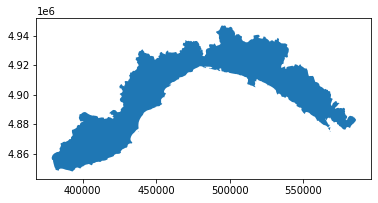

In [ ]:
regions[regions.DEN_REG=='Liguria'].plot()

In [ ]:
regions[regions.DEN_REG=='Liguria'].to_crs(epsg=4326).to_file("liguria.geojson",driver='GeoJSON')

In [ ]:
regions[regions.DEN_REG=='Liguria'].centroid.to_crs(epsg=4326).to_file("liguria_centroid.geojson",driver='GeoJSON')

In [ ]:
regions[regions.DEN_REG=='Liguria'].representative_point().to_crs(epsg=4326).to_file("liguria_representative_point.geojson",driver='GeoJSON')

In [ ]:
files.download("liguria.geojson")

In [ ]:
files.download("liguria_centroid.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('liguria_representative_point.geojson')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

you can upload all the geojson on [uMap](http://umap.openstreetmap.fr) to [see the result](http://umap.openstreetmap.fr/it/map/liguria_505528#8/44.058/9.075) 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/umap_liguria.jpg)